In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", None)


In [2]:
RAW_DATA_PATH = "../data/raw/"
PROCESSED_DATA_PATH = "../data/processed/"

os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)


In [3]:
df_ifnd = pd.read_csv(os.path.join(RAW_DATA_PATH, "IFND.csv"), encoding="latin1")
df_bharat = pd.read_csv(os.path.join(RAW_DATA_PATH, "bharatfakenewskosh_raw.csv"))
df_news = pd.read_csv(os.path.join(RAW_DATA_PATH, "news_dataset.csv"))

print("IFND:", df_ifnd.shape)
print("Bharat:", df_bharat.shape)
print("News:", df_news.shape)


IFND: (56714, 7)
Bharat: (26232, 19)
News: (3729, 2)


In [4]:
df_ifnd.head()
df_bharat.head()
df_news.head()


label  \
0  REAL   
1  FAKE   
2  FAKE   
3  REAL   
4  REAL   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [5]:
print("IFND Columns:", df_ifnd.columns.tolist())
print("Bharat Columns:", df_bharat.columns.tolist())
print("News Columns:", df_news.columns.tolist())


IFND Columns: ['id', 'Statement', 'Image', 'Web', 'Category', 'Date', 'Label']
Bharat Columns: ['id', 'Author_Name', 'Fact_Check_Source', 'Source_Type', 'Statement', 'Eng_Trans_Statement', 'News Body', 'Eng_Trans_News_Body', 'Media_Link', 'Publish_Date', 'Fact_Check_Link', 'News_Category', 'Language', 'Region', 'Platform', 'Text', 'Video', 'Image', 'Label']
News Columns: ['label', 'text']


In [6]:
# IFND
df_ifnd_clean = df_ifnd[["Statement", "Label"]].copy()
df_ifnd_clean.columns = ["text", "label"]
df_ifnd_clean["source"] = "IFND"

# Convert labels: TRUE/FALSE → 1/0
df_ifnd_clean["label"] = df_ifnd_clean["label"].map({"TRUE": 1, "FALSE": 0})

# Bharat Fake News Kosh
df_bharat_clean = df_bharat[["Eng_Trans_News_Body", "Label"]].copy()
df_bharat_clean.columns = ["text", "label"]
df_bharat_clean["source"] = "BharatFakeNewsKosh"

# True/False → 1/0
df_bharat_clean["label"] = df_bharat_clean["label"].map({True: 1, False: 0})

# News dataset
df_news_clean = df_news.copy()
df_news_clean["source"] = "NewsDataset"

# REAL/FAKE → 1/0
df_news_clean["label"] = df_news_clean["label"].map({"REAL": 1, "FAKE": 0})


In [7]:
df_combined = pd.concat(
    [df_ifnd_clean, df_bharat_clean, df_news_clean],
    axis=0,
    ignore_index=True
)

print("Combined Shape:", df_combined.shape)


Combined Shape: (86675, 3)


In [8]:
df_combined.info()
df_combined.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86675 entries, 0 to 86674
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    85795 non-null  object 
 1   label   67761 non-null  float64
 2   source  86675 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


text        880
label     18914
source        0
dtype: int64

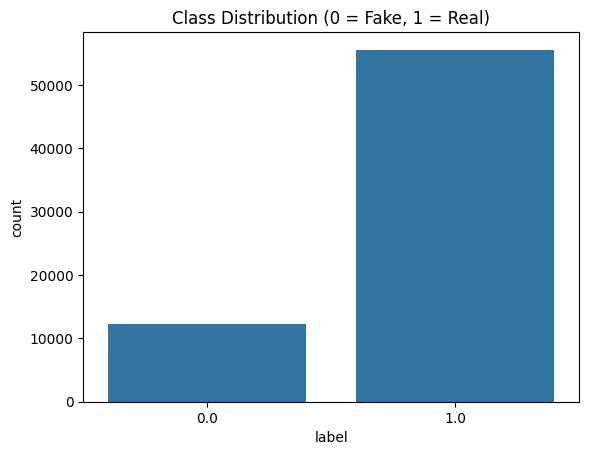

In [9]:
sns.countplot(x="label", data=df_combined)
plt.title("Class Distribution (0 = Fake, 1 = Real)")
plt.show()


In [10]:
combined_path = os.path.join(PROCESSED_DATA_PATH, "combined_raw_data.csv")
df_combined.to_csv(combined_path, index=False)

print("Saved to:", combined_path)


Saved to: ../data/processed/combined_raw_data.csv


In [11]:
print("Total Samples:", df_combined.shape[0])
print(df_combined["source"].value_counts())


Total Samples: 86675
source
IFND                  56714
BharatFakeNewsKosh    26232
NewsDataset            3729
Name: count, dtype: int64
